what I am doing

In [1]:
import xgems as xg
import numpy as np
import pandas as pd

In [2]:
xg_system_filename='gemsfiles/calcite-dat.lst'

# creating a xGEMS system based on a gems input file 
xgEngine = xg.ChemicalEngine(xg_system_filename)

In [3]:
# getting the index of phases
ndx_aq = xgEngine.indexPhase('aq_gen')
ndx_cal = xgEngine.indexPhase('Calcite')
ndx_C = xgEngine.indexElement('C')
ndx_Ca = xgEngine.indexElement('Ca')


In [4]:
# pressure + temperature for GEMS calculations
P=1e5 # 10 bar = 1e5 Pa
T=20.0+273.15 # Temperatur in Kelvin



In [5]:
xgEngine.reequilibrate(False)

2

In [6]:
# input output csv file
table_data = {
        'T' : [],
        '[C]': [],
        '[Ca]': [],
        'calcite': [],
        'pH':[],
        'gems_code': []
        }

In [7]:
# loop for changing the temperature

for t in range(5, 80, 2):
    
    # set temperature
    xgEngine.setPT(P, t+273.15)
    # reequilibrate
    code = xgEngine.reequilibrate(False)
    
    # extract the results
    table_data["T"].append(t)
    table_data["[C]"].append(xgEngine.elementAmountsInPhase(ndx_aq)[ndx_C])
    table_data["[Ca]"].append(xgEngine.elementAmountsInPhase(ndx_aq)[ndx_Ca])
    table_data["calcite"].append(xgEngine.phaseAmount(ndx_cal))
    table_data["pH"].append(xgEngine.pH())
    table_data["gems_code"].append(code)



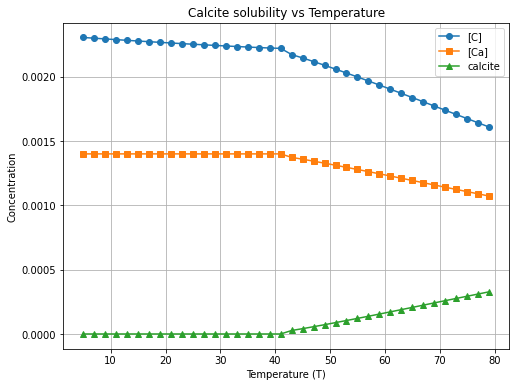

In [8]:
# plot the results
import matplotlib.pyplot as plt
import numpy as np

# Create plot
plt.figure(figsize=(8, 6))
plt.plot(table_data['T'], table_data['[C]'], label='[C]', marker='o')
plt.plot(table_data['T'], table_data['[Ca]'], label='[Ca]', marker='s')
plt.plot(table_data['T'], table_data['calcite'], label='calcite', marker='^')

# Labels and title
plt.xlabel('Temperature (T)')
plt.ylabel('Concentration')
plt.title('Calcite solubility vs Temperature')
plt.legend()
plt.grid(True)

# Show plot
plt.show()